# Identifying Patient Cohorts in [MIMIC-II](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3124312/)


In [1]:
%matplotlib inline

In [2]:
import pymysql
import pandas as pd
import getpass
import pandas as pd
import seaborn as sns
import datetime
import time
import matplotlib.pyplot as plt

In [18]:
conn = pymysql.connect(host="mysql",
                       port=3306,user="jovyan",
                       passwd=getpass.getpass("Enter MySQL passwd for jovyan"),db='mimic2')
cursor = conn.cursor()

Enter MySQL passwd for jovyan········


## Example Query: Heart Rate and Blood Pressure

#### Select a patient from the following ids
* 12613
* 11923
* 517
* 14898

In [5]:
hr = pd.read_sql("""SELECT subject_id, 
                           icustay_id, 
                           charttime, 
                           realtime,
                           value1num,
                           value1uom
                    FROM chartevents
                    WHERE itemid in (211) AND
                          subject_id in (11923)"""
    ,conn)
hr.head()

,subject_id,icustay_id,charttime,realtime,value1num,value1uom
0,11923,14882,2654-09-28 11:45:00,2654-09-28 11:57:00,115.0,BPM
1,11923,14882,2654-09-28 12:00:00,2654-09-28 12:04:00,118.0,BPM
2,11923,14882,2654-09-28 12:05:00,2654-09-28 13:36:00,122.0,BPM
3,11923,14882,2654-09-28 12:10:00,2654-09-28 13:36:00,177.0,BPM
4,11923,14882,2654-09-28 12:15:00,2654-09-28 13:36:00,194.0,BPM


In [6]:
bp = pd.read_sql("""SELECT subject_id, 
                           icustay_id, 
                           charttime, 
                           realtime,
                           value1num,
                           value1uom,
                           value2num,
                           value2uom
                    FROM chartevents
                    WHERE itemid in (6, 51, 455, 6701) AND
                          subject_id in (11923)"""
    ,conn)
bp.head()

,subject_id,icustay_id,charttime,realtime,value1num,value1uom,value2num,value2uom
0,11923,14882,2654-09-28 12:20:00,2654-09-28 13:36:00,117.0,mmHg,46.0,mmHg
1,11923,14882,2654-09-28 12:25:00,2654-09-28 13:36:00,185.0,mmHg,43.0,mmHg
2,11923,14882,2654-09-28 12:30:00,2654-09-28 13:36:00,248.0,mmHg,49.0,mmHg
3,11923,14882,2654-09-28 12:35:00,2654-09-28 13:36:00,192.0,mmHg,50.0,mmHg
4,11923,14882,2654-09-28 12:40:00,2654-09-28 13:36:00,159.0,mmHg,50.0,mmHg


In [7]:
print(bp["icustay_id"].value_counts())
print(bp["subject_id"].value_counts())

14882    4361
14884     199
Name: icustay_id, dtype: int64
11923    4560
Name: subject_id, dtype: int64


In [8]:
hr["icustay_id"].value_counts()

14882    4106
14884     191
Name: icustay_id, dtype: int64

### Plot Heart Rate as a Time Series

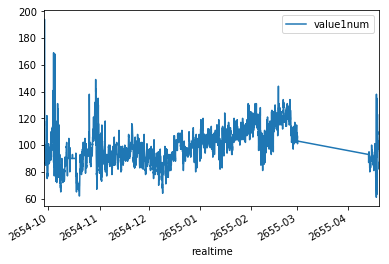

In [11]:
hr.plot(x="realtime", y=["value1num"])

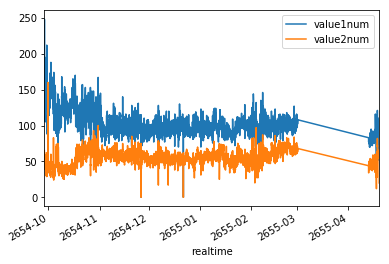

In [13]:
bp.plot(x="realtime", y=["value1num", "value2num"])

### decorator를 사용하여 graph 그려보기

In [16]:
hr.head()

,subject_id,icustay_id,charttime,realtime,value1num,value1uom
0,11923,14882,2654-09-28 11:45:00,2654-09-28 11:57:00,115.0,BPM
1,11923,14882,2654-09-28 12:00:00,2654-09-28 12:04:00,118.0,BPM
2,11923,14882,2654-09-28 12:05:00,2654-09-28 13:36:00,122.0,BPM
3,11923,14882,2654-09-28 12:10:00,2654-09-28 13:36:00,177.0,BPM
4,11923,14882,2654-09-28 12:15:00,2654-09-28 13:36:00,194.0,BPM


In [19]:
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets
from IPython.display import display

hr = pd.read_sql("""SELECT subject_id, 
                       icustay_id, 
                       charttime, 
                       realtime,
                       value1num,
                       value1uom
                FROM chartevents
                WHERE itemid in (211)"""
,conn)
patients = set(hr.subject_id)

@interaction(patient = patients)
def update(patient):
    hr["subject_id" == patient].plot(x="realtime", y = "value1num")

interact(update);

NameError: name 'interaction' is not defined